In [20]:
import numpy as np
import pandas as pd 
import seaborn as sb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score


# Problem1

# 0:

In [2]:
data_description = pd.read_excel("Data Dictionary.xls")
data_description

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [3]:
data = pd.read_csv("cs-training.csv")

In [4]:
data.set_index("Unnamed: 0",inplace=True)

In [5]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Data Processing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [7]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


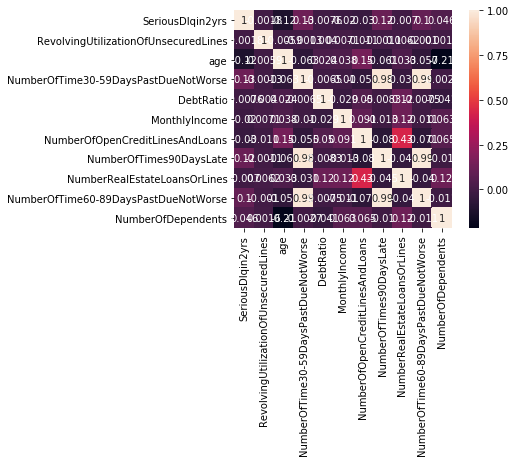

In [8]:
corr = data.corr()
sb.heatmap(corr,square=True, linecolor='white', annot=True)

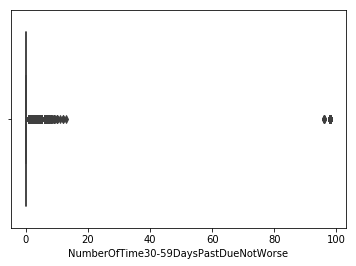

In [9]:
sb.boxplot(data["NumberOfTime30-59DaysPastDueNotWorse"])

In [10]:
len(data.index[data["NumberOfTime30-59DaysPastDueNotWorse"]>=20].tolist())

269

In [11]:
data.loc[data['NumberOfTime30-59DaysPastDueNotWorse'] > 20, 'NumberOfTime30-59DaysPastDueNotWorse'] = np.nan
data.loc[data['NumberOfTimes90DaysLate'] > 20, 'NumberOfTimes90DaysLate'] = np.nan
data.loc[data['NumberOfTime60-89DaysPastDueNotWorse'] > 20, 'NumberOfTime60-89DaysPastDueNotWorse'] = np.nan

Replace outlier in age columns

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a1ac550>,
      dtype=object)

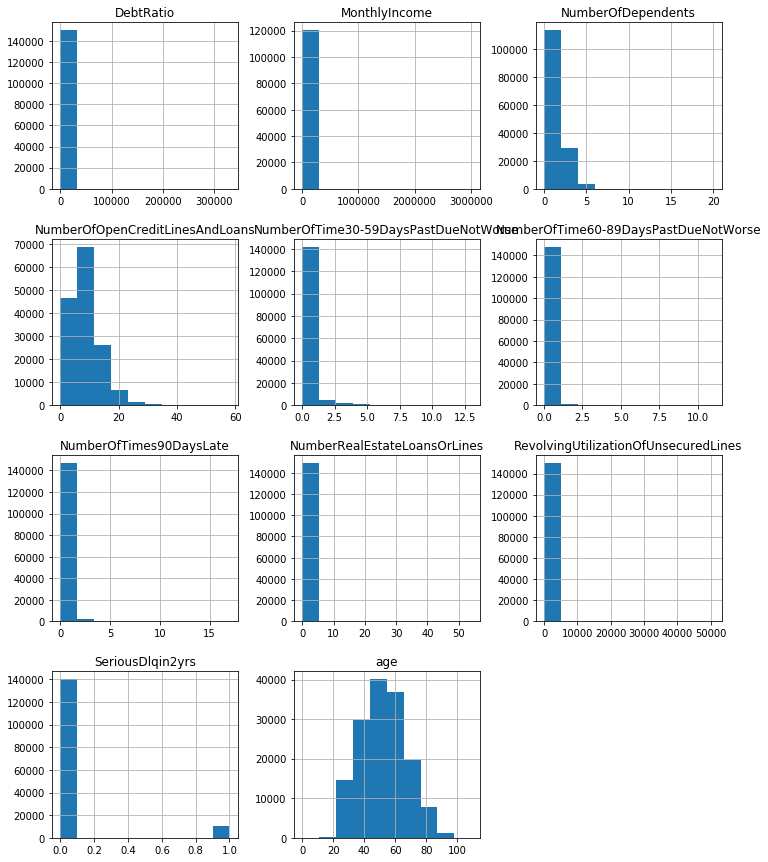

In [12]:
fig=plt.figure(figsize=(12,15))
ax=fig.gca()
data.hist(ax=ax)

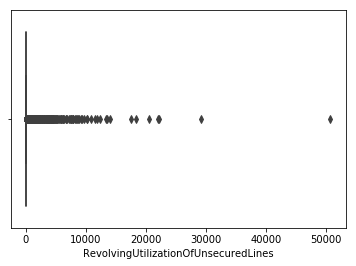

In [13]:
sb.boxplot(x=data.iloc[:,1])

In [14]:
len(data.index[data['RevolvingUtilizationOfUnsecuredLines']>=20000].tolist())

5

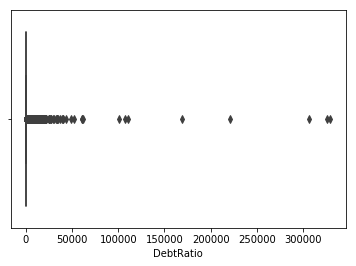

In [15]:
sb.boxplot(x=data["DebtRatio"])

In [16]:
len(data.index[data['DebtRatio']>=50000].tolist())

12

In [17]:
data.loc[data["age"]<20,'age'] = np.nan
data.loc[data['RevolvingUtilizationOfUnsecuredLines'] > 20000, 'RevolvingUtilizationOfUnsecuredLines'] = np.nan
data.loc[data['DebtRatio'] > 20000, 'DebtRatio'] = np.nan

In [18]:
data=data.fillna(data.mean())

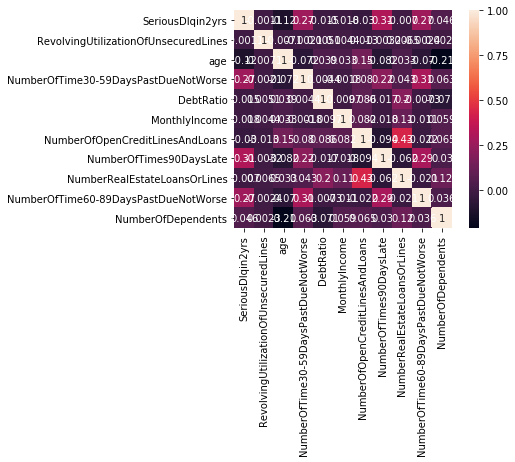

In [19]:
corr = data.corr()
sb.heatmap(corr,square=True, linecolor='white', annot=True)

In [20]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,5.085074,52.295555,0.245794,334.597546,6.670221e+03,8.452760,0.090456,1.018240,0.064823,0.757222
std,0.249746,174.010917,14.771249,0.697154,1043.374392,1.288045e+04,5.145951,0.485092,1.129771,0.329777,1.100404
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,18300.000000,109.000000,13.000000,20000.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [22]:
# split the train and test datasets
from sklearn.model_selection import train_test_split

y = data.iloc[:,0]
X = data.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Logitic Regression

In [25]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
y_pred = [x[1] for  x in y_pred]
# evaluate predictions with auc score
accuracy = roc_auc_score(y_test, y_pred)
print("auc=", accuracy)

auc= 0.8034612000154676


XGBoost

In [26]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
y_pred=xgb_model.predict_proba(X_test)
print('Accuracy: %.2f' % roc_auc_score(y_test,y_pred[:,1]))

Accuracy: 0.86


In [29]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators': [200,300,400]}
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = param_test1, scoring='roc_auc',cv=3)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 200}, 0.8646877659856417)

In [34]:
xgb_model = XGBClassifier(n_estimators=200)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
y_pred=xgb_model.predict_proba(X_test)

# 1:

In [41]:
#X_train["MonthlyIncome"]=X_train["MonthlyIncome"]+1000

extra_1000_income = X_test.copy()
extra_1000_income["MonthlyIncome"]=extra_1000_income["MonthlyIncome"]+1000

In [42]:
y_pred1=xgb_model.predict_proba(extra_1000_income)

In [43]:
extra_1000_income["MonthlyIncome"]=extra_1000_income["MonthlyIncome"]+1000

In [44]:
y_pred2=xgb_model.predict_proba(extra_1000_income)

In [45]:
extra_1000_income["MonthlyIncome"]=extra_1000_income["MonthlyIncome"]+1000

In [46]:
y_pred3=xgb_model.predict_proba(extra_1000_income)

In [60]:
compare = pd.DataFrame({'y_original_pred':y_pred[:,1],'y_1000_pred':y_pred1[:,1],'y_2000_pred':y_pred2[:,1],'y_3000_pred':y_pred3[:,1]})
compare.head(10)

,y_original_pred,y_1000_pred,y_2000_pred,y_3000_pred
0,0.009334,0.009334,0.010351,0.009177
1,0.078388,0.076617,0.080111,0.073917
2,0.020868,0.019679,0.018719,0.018719
3,0.030210,0.029571,0.025797,0.025797
4,0.031690,0.068175,0.068175,0.068175
5,0.087055,0.087055,0.087055,0.087055
6,0.023926,0.022484,0.022484,0.022484
7,0.024328,0.023295,0.023295,0.022191
8,0.050817,0.044551,0.044551,0.041181
9,0.050870,0.078065,0.078065,0.078065


In [61]:
compare.mean()

y_original_pred    0.066101
y_1000_pred        0.064109
y_2000_pred        0.063615
y_3000_pred        0.061752
dtype: float32

When the income increases, the probablity of being denied is decreasing.

# 2:

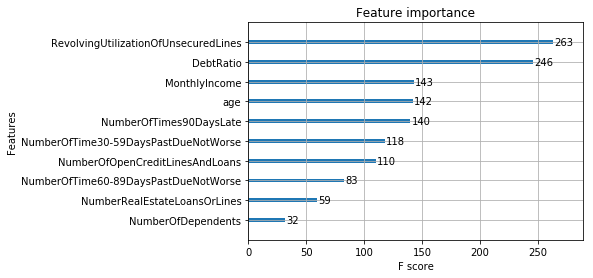

In [62]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

The most important feature is RevolvingUtilizationOfUnsecuredLines, and the second one is NumberOfTime30-59DaysPastDueNotWorse

# 3:

In [81]:
prob=pd.DataFrame({'Accept':y_pred[:,0],"Deny": y_pred[:,1],"age":X_test["age"],"label":y_test})
prob.head()

,Accept,Deny,age,label
Unnamed: 0,,,,
16270,0.990666,0.009334,56.0,0
140472,0.921612,0.078388,41.0,0
78684,0.979132,0.020868,48.0,0
2606,0.969790,0.030210,66.0,0
81157,0.968310,0.031690,25.0,0


In [82]:
"""prob.loc[prob['age'] <40, 'age_cat'] = 0
prob.loc[prob['age'] >=40, 'age_cat'] = 1"""

In [83]:
prob.head()

,Accept,Deny,age,label,age_cat
Unnamed: 0,,,,,
16270,0.990666,0.009334,56.0,0,1.0
140472,0.921612,0.078388,41.0,0,1.0
78684,0.979132,0.020868,48.0,0,1.0
2606,0.969790,0.030210,66.0,0,1.0
81157,0.968310,0.031690,25.0,0,0.0


In [97]:
youngs=prob[prob['age']<40]

In [107]:
young_deny_ratio = len(youngs[youngs["Deny"]>=0.5])/len(youngs)
young_deny_ratio

0.0371913741014689

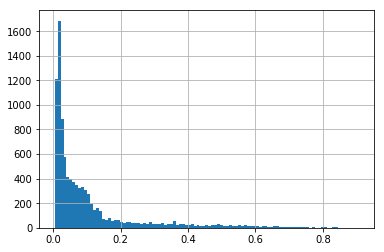

In [98]:
youngs["Deny"].hist(bins="auto")

In [94]:
olds=prob[prob['age']>=40]

In [106]:
old_deny_ratio = len(olds[olds["Deny"]>=0.5])/len(olds)
old_deny_ratio

0.017711364085760288

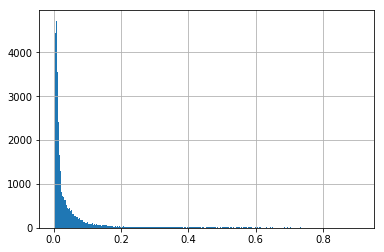

In [96]:
olds["Deny"].hist(bins="auto")

No discrimination, because the distribution of the olds and the young people predicted to have delinquency is almaost the same. Moreover, the olds are more unlikely to be denied by the bank, for the deny ratio of youngs are almost 3 times more than the olds.


# 4:

In [108]:
from sklearn.feature_selection import f_classif
scores, pvalues = f_classif(data["NumberOfDependents"].values.reshape(-1, 1), data["SeriousDlqin2yrs"].values.reshape(-1, 1))
pvalues

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6.19239176e-70])

The p-value between NumberOfDependents and SeriousDlqin2yrs is far lower than 0.05. So we can reject that NumberOfDependents has effect on SeriousDlqin2yrs.

# Problem 2

Writing

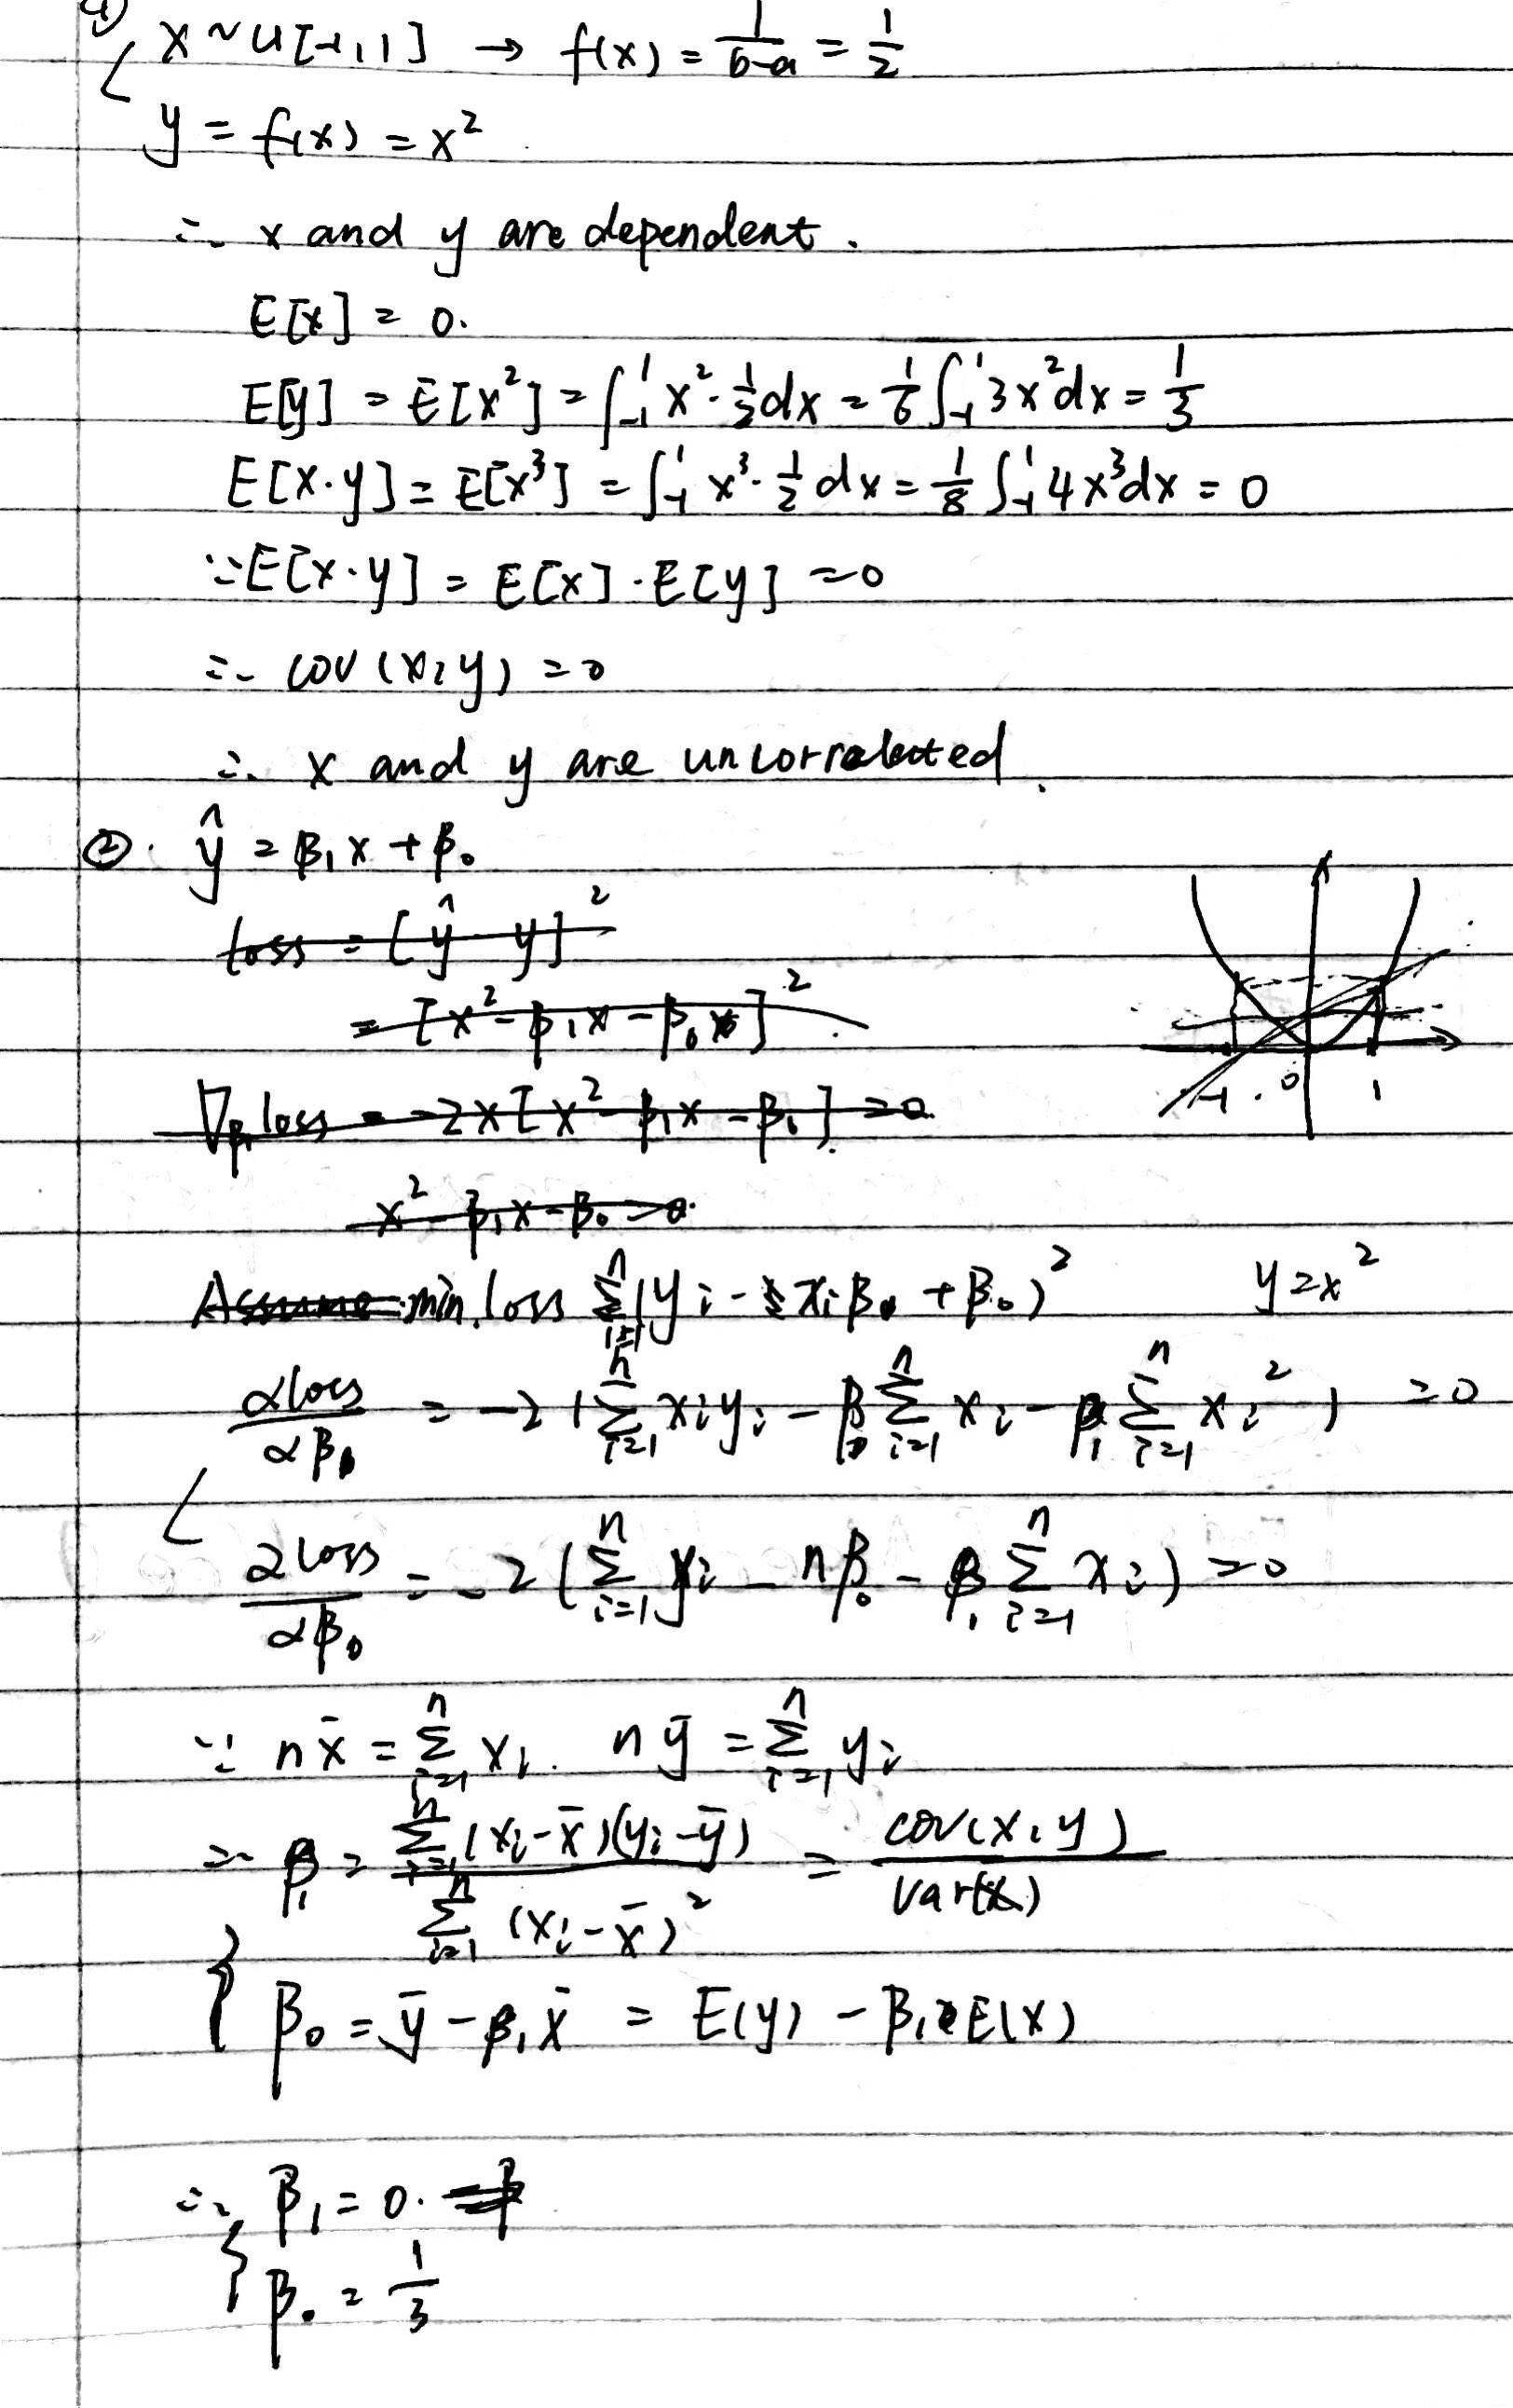

In [183]:
from IPython.display import Image
Image(filename='writing.jpg') 

In [115]:
label_x= -1 + 2*np.random.random(100)

In [116]:
label_y=label_x**2

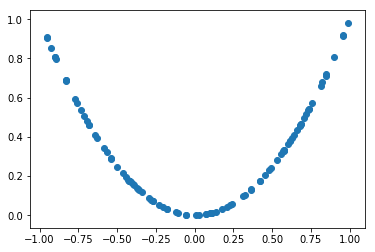

In [117]:
plt.scatter(label_x,label_y)

# problem 3:

# 0:

In [93]:
import tensorflow as tf
from tensorflow import keras

In [94]:
print(tf.__version__)

1.11.0


In [95]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [96]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [97]:
train_images.shape

(60000, 28, 28)

In [98]:
len(train_labels)

60000

In [99]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [100]:
test_images.shape

(10000, 28, 28)

In [101]:
len(test_labels)

10000

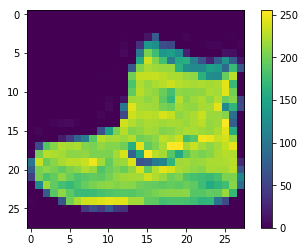

In [102]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [103]:
train_images = train_images / 255.0

test_images = test_images / 255.0

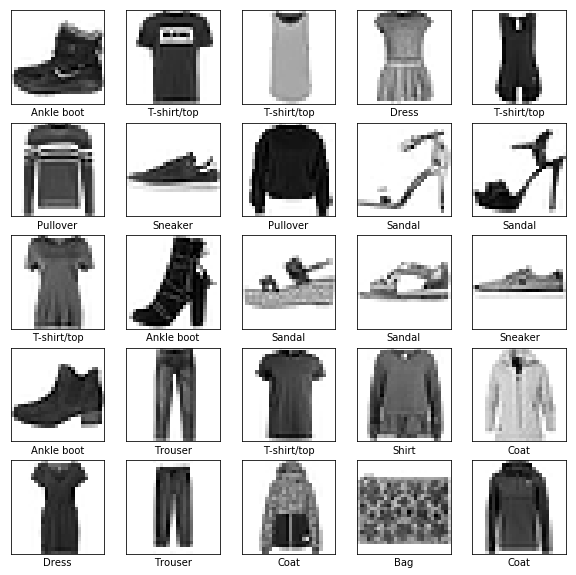

In [104]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [105]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [106]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.4985 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3760 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3368 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3128 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2960 - acc: 0.8902


In [108]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/step
Test accuracy: 0.8676


In [109]:
predictions = model.predict(test_images)

In [110]:
predictions[0]

array([5.0405930e-07, 2.8230639e-08, 9.3978684e-07, 3.0499837e-06,
       1.9765553e-06, 5.9490296e-04, 9.8917303e-07, 1.2551806e-02,
       2.5400115e-05, 9.8682040e-01], dtype=float32)

In [111]:
np.argmax(predictions[0])

9

In [112]:
test_labels[0]

9

In [113]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

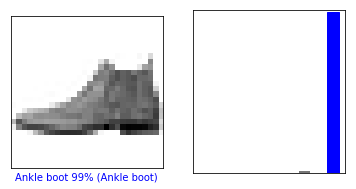

In [114]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

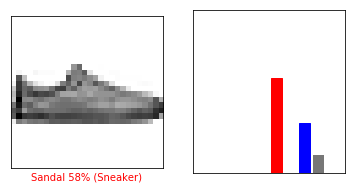

In [115]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

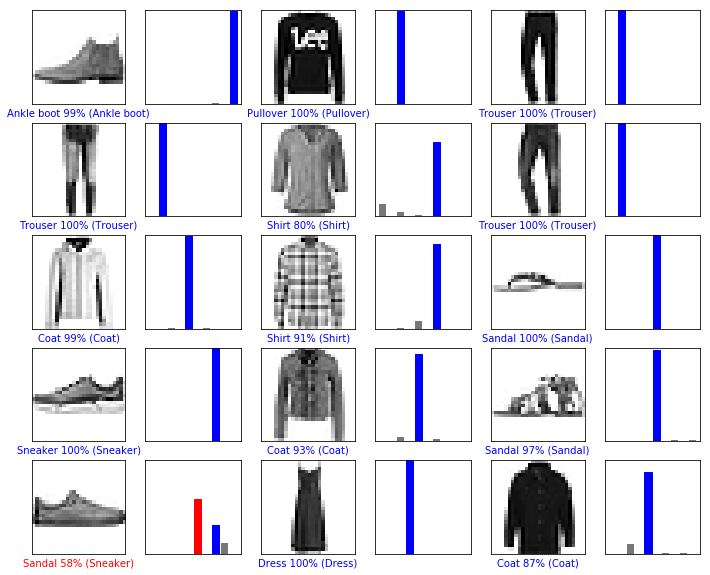

In [116]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [117]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [118]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [119]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.0405930e-07 2.8230639e-08 9.3978412e-07 3.0499837e-06 1.9765553e-06
  5.9490267e-04 9.8917201e-07 1.2551799e-02 2.5400066e-05 9.8682040e-01]]


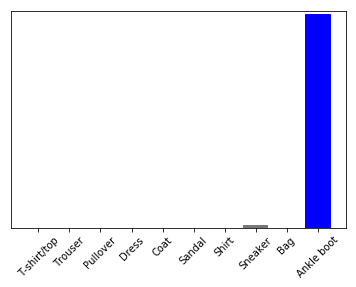

In [120]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [121]:
np.argmax(predictions_single[0])

9

# 1:

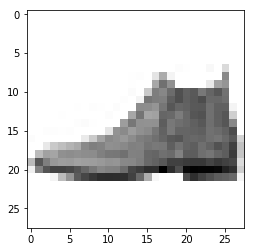

In [122]:
origin_images = test_images[0]
origin_images
plt.imshow(origin_images, cmap=plt.cm.binary)

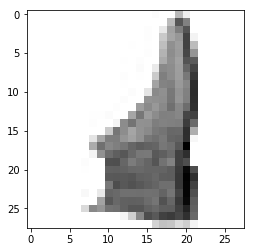

In [123]:
image1 = test_images[0].T
image1
plt.imshow(image1, cmap=plt.cm.binary)

In [124]:
rotated_images = []

for i in range(5):
    each_rotate = test_images[i].T
    rotated_images.append(each_rotate)
rotated_images = np.array(rotated_images)

In [125]:
rotated_images.shape

(5, 28, 28)

In [126]:
rotate_test_labels = test_labels[:5]

In [127]:
test_loss, test_acc = model.evaluate(rotated_images, rotate_test_labels)

print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 715us/step
Test accuracy: 0.0


In [128]:
rotate_predictions = model.predict(rotated_images)

In [129]:
rotate_predictions[0]

array([5.1563974e-02, 5.6166366e-05, 4.5646960e-03, 8.8485652e-01,
       3.0967679e-03, 4.2344697e-04, 2.5757981e-02, 6.9105614e-04,
       2.3925629e-02, 5.0637815e-03], dtype=float32)

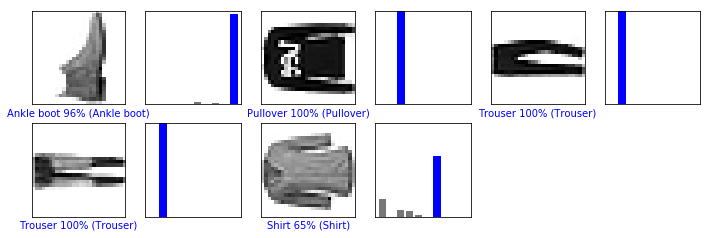

In [147]:
num_images = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, rotate_predictions, rotate_test_labels, rotated_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, rotate_predictions, rotate_test_labels)

The model cannot recognize the rotated test images.

In [130]:
half=len(train_images)

In [131]:
rotated_images_train = []
for i in range(half):
    each_rotate = train_images[i].T
    rotated_images_train.append(each_rotate)
rotated_images_train = np.array(rotated_images_train)

In [133]:
rotated_images_train.shape

(60000, 28, 28)

In [134]:
newtrain=np.append(rotated_images_train,train_images,axis=0)

In [135]:
newtrain.shape

(120000, 28, 28)

In [136]:
newlabel=np.append(train_labels,train_labels,axis=0)

In [137]:
model.fit(newtrain, newlabel, epochs=5)

Epoch 1/5
120000/120000 [==============================] - 13s 111us/step - loss: 0.4443 - acc: 0.8439
Epoch 2/5
120000/120000 [==============================] - 12s 99us/step - loss: 0.3624 - acc: 0.8699
Epoch 3/5
120000/120000 [==============================] - 12s 96us/step - loss: 0.3344 - acc: 0.8792
Epoch 4/5
120000/120000 [==============================] - 13s 104us/step - loss: 0.3153 - acc: 0.8859
Epoch 5/5
120000/120000 [==============================] - 11s 95us/step - loss: 0.3006 - acc: 0.8908


In [138]:
rotated_test_images = []
for i in range(len(test_images)):
    each_rotate = test_images[i].T
    rotated_test_images.append(each_rotate)
rotated_test_images = np.array(rotated_test_images)

In [140]:
test_loss, test_acc = model.evaluate(rotated_test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/step
Test accuracy: 0.8633


In [142]:
rotate_predictions = model.predict(rotated_images)

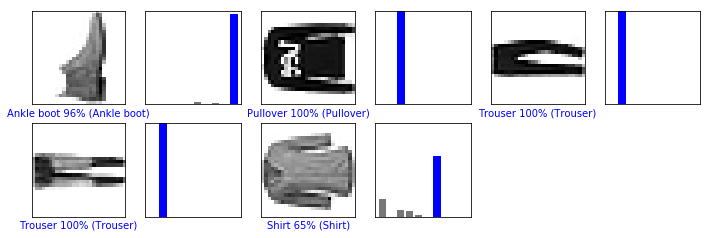

In [143]:
num_images = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, rotate_predictions, rotate_test_labels, rotated_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, rotate_predictions, rotate_test_labels)

After I modified the trainning set by adding rotated images into training set and refitting the model, the model is getting better and is able to predict rotated pictures as well.

# 2:

In [169]:
%run /Users/hongfan/models/tutorials/image/imagenet/classify_image.py

>> Downloading inception-2015-12-05.tgz 100.0%
Successfully downloaded inception-2015-12-05.tgz 88931400 bytes.
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca (score = 0.89107)
indri, indris, Indri indri, Indri brevicaudatus (score = 0.00779)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens (score = 0.00296)
custard apple (score = 0.00147)
earthstar (score = 0.00117)


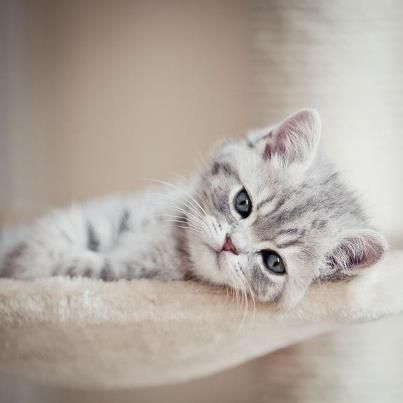

In [173]:
from IPython.display import Image
Image(filename='1.jpg',width=150,height=150) 

In [174]:
%run /Users/hongfan/models/tutorials/image/imagenet/classify_image.py  --image_file 1.jpg

Egyptian cat (score = 0.68438)
tabby, tabby cat (score = 0.12075)
lynx, catamount (score = 0.03957)
snow leopard, ounce, Panthera uncia (score = 0.01895)
Persian cat (score = 0.01620)


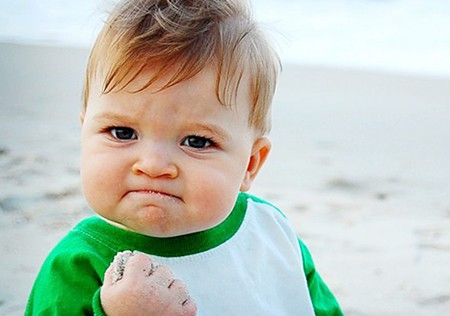

In [175]:
from IPython.display import Image
Image(filename='2.jpg',width=150,height=150) 

In [177]:
%run /Users/hongfan/models/tutorials/image/imagenet/classify_image.py  --image_file 2.jpg

bib (score = 0.56094)
bucket, pail (score = 0.04889)
Band Aid (score = 0.04026)
ice lolly, lolly, lollipop, popsicle (score = 0.02649)
sandbar, sand bar (score = 0.01692)


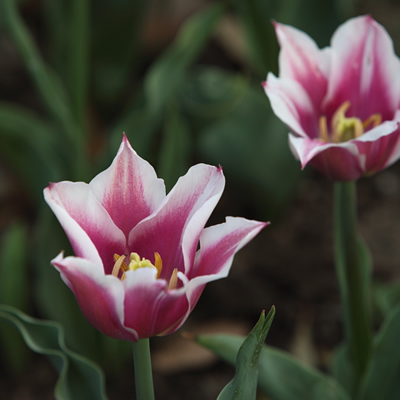

In [176]:
from IPython.display import Image
Image(filename='3.jpg',width=150,height=150) 

In [178]:
%run /Users/hongfan/models/tutorials/image/imagenet/classify_image.py  --image_file 3.jpg

daisy (score = 0.20868)
pot, flowerpot (score = 0.12160)
artichoke, globe artichoke (score = 0.04494)
bee (score = 0.03609)
vase (score = 0.03588)


# 3:

In [179]:
%run /Users/hongfan/models/tutorials/image/cifar10/cifar10_train.py

>> Downloading cifar-10-binary.tar.gz 100.0%
Successfully downloaded cifar-10-binary.tar.gz 170052171 bytes.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.
INFO:tensorflow:Summary name local3/weight_loss (raw) is illegal; using local3/weight_loss__raw_ instead.
INFO:tensorflow:Summary name local4/weight_loss (raw) is illegal; using local4/weight_loss__raw_ instead.
INFO:tensorflow:Summary name cross_entropy (raw) is illegal; using cross_entropy__raw_ instead.
INFO:tensorflow:Summary name total_loss (raw) is illegal; using total_loss__raw_ instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.

2018-11-29 17:57:08.988105: step 700, loss = 2.82 (216.5 examples/sec; 0.591 sec/batch)
2018-11-29 17:57:14.829173: step 710, loss = 2.75 (219.1 examples/sec; 0.584 sec/batch)
2018-11-29 17:57:20.655680: step 720, loss = 2.65 (219.7 examples/sec; 0.583 sec/batch)
2018-11-29 17:57:26.466992: step 730, loss = 2.82 (220.3 examples/sec; 0.581 sec/batch)
2018-11-29 17:57:32.283388: step 740, loss = 2.71 (220.1 examples/sec; 0.582 sec/batch)
2018-11-29 17:57:38.076152: step 750, loss = 2.98 (221.0 examples/sec; 0.579 sec/batch)
2018-11-29 17:57:43.844653: step 760, loss = 2.74 (221.9 examples/sec; 0.577 sec/batch)
2018-11-29 17:57:49.577604: step 770, loss = 2.77 (223.3 examples/sec; 0.573 sec/batch)
2018-11-29 17:57:55.341118: step 780, loss = 2.62 (222.1 examples/sec; 0.576 sec/batch)
2018-11-29 17:58:01.494594: step 790, loss = 2.58 (208.0 examples/sec; 0.615 sec/batch)
INFO:tensorflow:global_step/sec: 1.6813
2018-11-29 17:58:08.462334: step 800, loss = 2.88 (183.7 examples/sec; 0.697 sec

2018-11-29 18:05:52.666475: step 1580, loss = 1.66 (220.1 examples/sec; 0.582 sec/batch)
2018-11-29 18:05:58.697023: step 1590, loss = 1.77 (212.3 examples/sec; 0.603 sec/batch)
INFO:tensorflow:global_step/sec: 1.61403
2018-11-29 18:06:05.122182: step 1600, loss = 1.77 (199.2 examples/sec; 0.643 sec/batch)
2018-11-29 18:06:11.476601: step 1610, loss = 1.64 (201.4 examples/sec; 0.635 sec/batch)
2018-11-29 18:06:18.143762: step 1620, loss = 1.80 (192.0 examples/sec; 0.667 sec/batch)
2018-11-29 18:06:24.850108: step 1630, loss = 1.92 (190.9 examples/sec; 0.671 sec/batch)
2018-11-29 18:06:31.090533: step 1640, loss = 1.79 (205.1 examples/sec; 0.624 sec/batch)
2018-11-29 18:06:37.131130: step 1650, loss = 1.83 (211.9 examples/sec; 0.604 sec/batch)
2018-11-29 18:06:43.455059: step 1660, loss = 1.77 (202.4 examples/sec; 0.632 sec/batch)
2018-11-29 18:06:49.537306: step 1670, loss = 1.57 (210.4 examples/sec; 0.608 sec/batch)
2018-11-29 18:06:55.723869: step 1680, loss = 1.75 (206.9 examples/se

2018-11-29 18:14:31.257234: step 2460, loss = 1.50 (222.9 examples/sec; 0.574 sec/batch)
2018-11-29 18:14:36.992354: step 2470, loss = 1.36 (223.2 examples/sec; 0.574 sec/batch)
2018-11-29 18:14:42.707972: step 2480, loss = 1.54 (223.9 examples/sec; 0.572 sec/batch)
2018-11-29 18:14:48.429669: step 2490, loss = 1.41 (223.7 examples/sec; 0.572 sec/batch)
INFO:tensorflow:global_step/sec: 1.72573
2018-11-29 18:14:54.294128: step 2500, loss = 1.42 (218.3 examples/sec; 0.586 sec/batch)
2018-11-29 18:15:00.062678: step 2510, loss = 1.51 (221.9 examples/sec; 0.577 sec/batch)
2018-11-29 18:15:05.792682: step 2520, loss = 1.39 (223.4 examples/sec; 0.573 sec/batch)
2018-11-29 18:15:11.589564: step 2530, loss = 1.41 (220.8 examples/sec; 0.580 sec/batch)
2018-11-29 18:15:20.496287: step 2540, loss = 1.34 (143.7 examples/sec; 0.891 sec/batch)
2018-11-29 18:15:28.843243: step 2550, loss = 1.51 (153.3 examples/sec; 0.835 sec/batch)
2018-11-29 18:15:35.394745: step 2560, loss = 1.38 (195.4 examples/se

2018-11-29 18:23:42.713568: step 3340, loss = 1.23 (209.7 examples/sec; 0.610 sec/batch)
2018-11-29 18:23:48.327545: step 3350, loss = 1.19 (228.0 examples/sec; 0.561 sec/batch)
2018-11-29 18:23:54.020709: step 3360, loss = 1.26 (224.8 examples/sec; 0.569 sec/batch)
2018-11-29 18:23:59.669037: step 3370, loss = 1.16 (226.6 examples/sec; 0.565 sec/batch)
2018-11-29 18:24:05.298701: step 3380, loss = 1.25 (227.4 examples/sec; 0.563 sec/batch)
2018-11-29 18:24:10.958974: step 3390, loss = 1.12 (226.1 examples/sec; 0.566 sec/batch)
INFO:tensorflow:global_step/sec: 1.70208
2018-11-29 18:24:16.699891: step 3400, loss = 1.14 (223.0 examples/sec; 0.574 sec/batch)
2018-11-29 18:24:22.330132: step 3410, loss = 1.18 (227.3 examples/sec; 0.563 sec/batch)
2018-11-29 18:24:28.422157: step 3420, loss = 1.17 (210.1 examples/sec; 0.609 sec/batch)
2018-11-29 18:24:34.117898: step 3430, loss = 1.47 (224.7 examples/sec; 0.570 sec/batch)
2018-11-29 18:24:39.748075: step 3440, loss = 1.11 (227.3 examples/se

2018-11-29 18:32:40.828809: step 4220, loss = 1.22 (215.2 examples/sec; 0.595 sec/batch)
2018-11-29 18:32:46.721372: step 4230, loss = 1.06 (217.2 examples/sec; 0.589 sec/batch)
2018-11-29 18:32:52.554526: step 4240, loss = 1.17 (219.4 examples/sec; 0.583 sec/batch)
2018-11-29 18:32:58.467939: step 4250, loss = 1.10 (216.5 examples/sec; 0.591 sec/batch)
2018-11-29 18:33:04.293127: step 4260, loss = 1.15 (219.7 examples/sec; 0.583 sec/batch)
2018-11-29 18:33:10.194148: step 4270, loss = 1.03 (216.9 examples/sec; 0.590 sec/batch)
2018-11-29 18:33:16.067074: step 4280, loss = 1.15 (217.9 examples/sec; 0.587 sec/batch)
2018-11-29 18:33:21.899951: step 4290, loss = 1.00 (219.4 examples/sec; 0.583 sec/batch)
INFO:tensorflow:global_step/sec: 1.68896
2018-11-29 18:33:28.201565: step 4300, loss = 1.20 (203.1 examples/sec; 0.630 sec/batch)
2018-11-29 18:33:34.414444: step 4310, loss = 1.00 (206.0 examples/sec; 0.621 sec/batch)
2018-11-29 18:33:40.508908: step 4320, loss = 1.10 (210.0 examples/se

INFO:tensorflow:global_step/sec: 1.57965
2018-11-29 18:41:24.267588: step 5100, loss = 1.15 (152.8 examples/sec; 0.838 sec/batch)
2018-11-29 18:41:31.525372: step 5110, loss = 1.02 (176.4 examples/sec; 0.726 sec/batch)
2018-11-29 18:41:38.631805: step 5120, loss = 0.98 (180.1 examples/sec; 0.711 sec/batch)
2018-11-29 18:41:45.114559: step 5130, loss = 1.10 (197.4 examples/sec; 0.648 sec/batch)
2018-11-29 18:41:52.143208: step 5140, loss = 1.04 (182.1 examples/sec; 0.703 sec/batch)
2018-11-29 18:41:58.515026: step 5150, loss = 0.99 (200.9 examples/sec; 0.637 sec/batch)
2018-11-29 18:42:04.580219: step 5160, loss = 1.14 (211.0 examples/sec; 0.607 sec/batch)
2018-11-29 18:42:10.821640: step 5170, loss = 0.86 (205.1 examples/sec; 0.624 sec/batch)
2018-11-29 18:42:16.959515: step 5180, loss = 0.89 (208.5 examples/sec; 0.614 sec/batch)
2018-11-29 18:42:22.976636: step 5190, loss = 1.14 (212.7 examples/sec; 0.602 sec/batch)
INFO:tensorflow:global_step/sec: 1.51028
2018-11-29 18:42:30.477179: 

2018-11-29 18:50:30.757686: step 5980, loss = 0.91 (208.1 examples/sec; 0.615 sec/batch)
2018-11-29 18:50:36.615380: step 5990, loss = 0.91 (218.5 examples/sec; 0.586 sec/batch)
INFO:tensorflow:global_step/sec: 1.54006
2018-11-29 18:50:42.975217: step 6000, loss = 1.05 (201.3 examples/sec; 0.636 sec/batch)
2018-11-29 18:50:48.821690: step 6010, loss = 0.92 (218.9 examples/sec; 0.585 sec/batch)
2018-11-29 18:50:54.693695: step 6020, loss = 1.20 (218.0 examples/sec; 0.587 sec/batch)
2018-11-29 18:51:00.471368: step 6030, loss = 0.92 (221.5 examples/sec; 0.578 sec/batch)
2018-11-29 18:51:06.326435: step 6040, loss = 1.11 (218.6 examples/sec; 0.586 sec/batch)
2018-11-29 18:51:12.649640: step 6050, loss = 0.98 (202.4 examples/sec; 0.632 sec/batch)
2018-11-29 18:51:20.421671: step 6060, loss = 0.95 (164.7 examples/sec; 0.777 sec/batch)
2018-11-29 18:51:27.890329: step 6070, loss = 0.87 (171.4 examples/sec; 0.747 sec/batch)
2018-11-29 18:51:34.285891: step 6080, loss = 1.04 (200.1 examples/se

INFO:tensorflow:Saving checkpoints for 6860 into /tmp/cifar10_train/model.ckpt.
2018-11-29 19:00:01.756917: step 6860, loss = 1.00 (175.5 examples/sec; 0.729 sec/batch)
2018-11-29 19:00:09.929899: step 6870, loss = 0.83 (156.6 examples/sec; 0.817 sec/batch)
2018-11-29 19:00:16.349869: step 6880, loss = 1.03 (199.4 examples/sec; 0.642 sec/batch)
2018-11-29 19:00:24.112096: step 6890, loss = 0.92 (164.9 examples/sec; 0.776 sec/batch)
INFO:tensorflow:global_step/sec: 1.45385
2018-11-29 19:00:30.531040: step 6900, loss = 0.91 (199.4 examples/sec; 0.642 sec/batch)
2018-11-29 19:00:36.745817: step 6910, loss = 0.84 (206.0 examples/sec; 0.621 sec/batch)
2018-11-29 19:00:42.960797: step 6920, loss = 1.03 (206.0 examples/sec; 0.621 sec/batch)
2018-11-29 19:00:49.363946: step 6930, loss = 1.09 (199.9 examples/sec; 0.640 sec/batch)
2018-11-29 19:00:55.980125: step 6940, loss = 0.95 (193.5 examples/sec; 0.662 sec/batch)
2018-11-29 19:01:02.686687: step 6950, loss = 0.84 (190.9 examples/sec; 0.671 

KeyboardInterrupt: 

I tried, but it takes too much time to run.

# Problem 4:

Form the final project teams and make your project proposal. What datasets are you planning to use/collect? What are you planning to do with them?

Final project description:  

    We are going to do facical expression recognition by using neutral network. Our data set will be the human face with different emotions they have expressed. We will base on their facical expression to predict their emotion.
    Here is our dataset option: https://www.kaggle.com/c/emotion-detection-from-facial-expressions/data